In this notebook, we will discuss the implementation of a ***simple linear SVM for binary classification*** from scratch. We will also look at the implementation using sklearn library for the same.

# **Concept**

We have n-dimensional data.
$$x_i\in R^{n}, \forall i$$
$$y_i\in\{-1,1\},\forall i$$
Let the optimal hyperplane be 
$$w.x+b=0$$
i.e, it classifies as class 1 (y=+1) if, $w.x+b\geq0$ and class -1 (y=-1) if, $w.x+b\lneq0$

We can normalize $w,b$ such so that the margin distance becomes
$$\rho = \frac{2}{||w||}$$
To maximise margin, we need to minimise $||w||^2$.

For hard margin SVM, the optimisation problem boils down to 
$$min \dfrac{1}{2}||w||^2, $$
subject to $$y_i(w.x_i+b)\geq 1, \forall i$$

For soft margin SVMs, to penalise misclassifications, we introduce a slack variable, to the objective function, such that
$$y_i(w.x_i+b)\geq 1⇒\xi_i=0$$
$$y_i(w.x_i+b)\lneq 1⇒\xi_i=1-y_i(w.x_i+b)$$

Hence, our problem becomes,
$$min \dfrac{1}{2}||w||^2+ C\sum\xi_i $$
subject to $$y_i(w.x_i+b)\geq 1-\xi_i, \forall i,$$
$$\xi_i\geq 0,\forall i$$
This can be reframed and written as
$$min \dfrac{1}{2}||w||^2+ \dfrac{C}{m}\sum_i max\{0,1-y_i(w.x_i+b)\}$$
The following term has a special name, called *Hinge Loss*
$$max\{0,1-y_i(w.x+b)\}$$

Hence, our goal is to minimise $J$ where,
$$J=\dfrac{1}{m}\sum_i\bigg[\dfrac{1}{2}||w||^2+ C.max\{0,1-y_i(w.x_i+b)\}\bigg]$$

# **Gradient Descent**

If $y_i(w.x_i+b)\geq1$, then
 $$\dfrac{dJ_i}{dw_k}=w_k$$
 $$\dfrac{dJ_i}{db}=0$$
Else if $y_i(w.x_i+b)\lneq1$, then
 $$\dfrac{dJ_i}{dw_k}= w_k- C.y_i.x_{ik}$$
 $$\dfrac{dJ_i}{db}=-Cy_i$$

For each $x_i$
$$w=w-\gamma.\nabla J(w,b)$$
$$b=b-\gamma.\nabla J(w,b) $$

# **SVM from scratch**

In [51]:
import numpy as np
import matplotlib.pyplot as plt

class SVM:

    def __init__(self, learning_rate=0.0001, n_iters=10000, C=100):
        self.lr = learning_rate
        self.n = n_iters
        self.C=C
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        y = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for j in range(self.n):
            for i, x_i in enumerate(X):
                condition = y[i] * (np.dot(x_i, self.w) + self.b) >= 1
                if condition:
                    self.w -= self.lr * (self.w)
                else:
                    self.w -= self.lr * (self.w - (x_i*self.C*y[i]))
                    self.b -= self.lr * (-self.C* y[i])

    def predict(self, X):
        val = np.dot(X, self.w) + self.b
        return np.sign(val)


svm_scratch=SVM()  

Note that this is just the code for a linear SVM with l2 regularization, to achieve binary classification. This implementation covers both hard and soft margin SVMs, but isn't generalized to use kernels or l1 regularization.

# **SVM using sklearn library**

In [52]:
from sklearn import svm

svm_inbuilt=svm.SVC(kernel='linear') # since default is rbf

Yes, that is it! These libraries are incredibly powerful, and make our lives easier. Moreover, we can hypertune this SVM to a greater extent and it is definitely faster than models implemented from scratch.

# **Creating dataset**

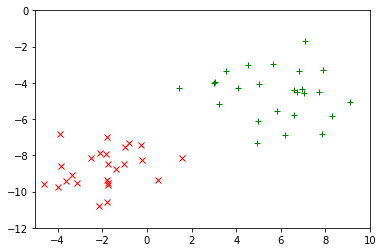

In [53]:
from sklearn import datasets

X, y = datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.5, random_state=40)

plt.xlim([-5,10])
plt.ylim([-12,0])

for i in range(50):
    if(y[i]==0):
        plt.plot(X[i][0],X[i][1],'rx')
    else:
        plt.plot(X[i][0],X[i][1],'g+')

plt.show()

# **Training both the models**

In [54]:
svm_scratch.fit(X,y)
print("Trained SVM from scratch on the data")
print(svm_scratch.w,svm_scratch.b)

svm_inbuilt.fit(X,y)
print("Trained inbuilt SVM on the data")
print(svm_inbuilt.coef_,svm_inbuilt.intercept_)
# print(svm_inbuilt.get_params())

Trained SVM from scratch on the data
[0.51209129 0.58785231] 2.8799999999999826
Trained inbuilt SVM on the data
[[0.46072585 0.5322047 ]] [2.60859531]


# **Plotting**

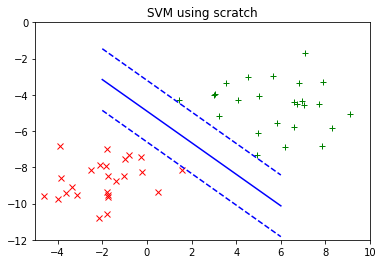

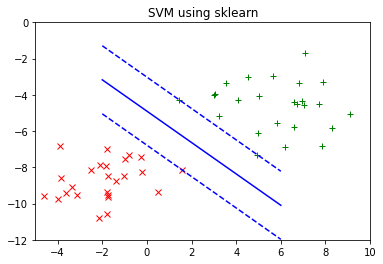

In [55]:
for i in range(50):
    if(y[i]==0):
        plt.plot(X[i][0],X[i][1],'rx')
    else:
        plt.plot(X[i][0],X[i][1],'g+')

x = np.linspace(-2, 6, 100)

plt.plot(x,(-svm_scratch.b-(svm_scratch.w[0]*x))/svm_scratch.w[1],'b-')
plt.plot(x,(-svm_scratch.b-1-(svm_scratch.w[0]*x))/svm_scratch.w[1],'b--')
plt.plot(x,(-svm_scratch.b+1-(svm_scratch.w[0]*x))/svm_scratch.w[1],'b--')

plt.xlim([-5,10])
plt.ylim([-12,0])
plt.title('SVM using scratch')
plt.show()

for i in range(50):
    if(y[i]==0):
        plt.plot(X[i][0],X[i][1],'rx')
    else:
        plt.plot(X[i][0],X[i][1],'g+')

x = np.linspace(-2, 6, 100)

plt.plot(x,(-svm_inbuilt.intercept_[0]-(svm_inbuilt.coef_[0][0]*x))/svm_inbuilt.coef_[0][1],'b-')
plt.plot(x,(-svm_inbuilt.intercept_[0]-1-(svm_inbuilt.coef_[0][0]*x))/svm_inbuilt.coef_[0][1],'b--')
plt.plot(x,(-svm_inbuilt.intercept_[0]+1-(svm_inbuilt.coef_[0][0]*x))/svm_inbuilt.coef_[0][1],'b--')

plt.xlim([-5,10])
plt.ylim([-12,0])
plt.title('SVM using sklearn')
plt.show()